# Udacity CarND Capstone Project - Traffic Light Detection & Classification
# Load Highway Camera Images

In [3]:
#import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import time
import glob

red = glob.glob("data/highway/0-Red/*.*")
yellow = glob.glob("data/highway/1-Yellow/*.*")
green = glob.glob("data/highway/2-Green/*.*")
unknown = glob.glob("data/highway/3-Unknown/*.*")

print(len(red), 'Red traffic light images')
print(len(yellow), 'Yellow traffic light images')
print(len(green), 'Green traffic light images')
print(len(unknown), 'Non-raffic light images')
example_img = mpimg.imread(green[60])
print(example_img.shape, 'image shape')


755 Red traffic light images
110 Yellow traffic light images
357 Green traffic light images
1524 Non-raffic light images
(600, 800, 3) image shape


# Use pre-trained VGG-16 inference to look for Traffic Light

In [4]:
import keras
import numpy as np
from keras.applications import vgg16
#Load the VGG16 model
vgg_model = vgg16.VGG16(weights='imagenet')

PIL image size =  (224, 224)
NumPy image size =  (224, 224, 3)
Input image size =  (1, 224, 224, 3)
label_vgg16 =  ('n06874185', 'traffic_light', 0.9989497)


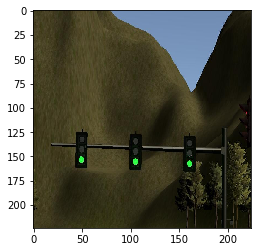

In [5]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions

%matplotlib inline

# load an image in PIL format
original_image = load_img(green[0], target_size=(224, 224))

# convert the PIL image (width, height) to a NumPy array (height, width, channel)
#image = cv2.resize(example_img, (224, 224))
numpy_image = img_to_array(original_image)

# Convert the image into 4D Tensor (samples, height, width, channels) by adding an extra dimension to the axis 0.
input_image = np.expand_dims(numpy_image, axis=0)

print('PIL image size = ', original_image.size)
print('NumPy image size = ', numpy_image.shape)
print('Input image size = ', input_image.shape)
#plot tensor
plt.imshow(np.uint8(input_image[0]))

#preprocess for vgg16
processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())

# vgg16
predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
label_vgg16 = decode_predictions(predictions_vgg16)
print ('label_vgg16 = ', label_vgg16[0][0])

In [14]:
from random import shuffle

shuffle(red)
shuffle(yellow)
shuffle(green)
shuffle(unknown)



In [15]:
# initialize the data and labels
print("[INFO] loading images for classifer training...")
data = []
labels = []

# loop over the red images
for imagePath in red:
    # load the image, pre-process it, and store it in the data list
    print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 0 
        #data.append(processed_image_vgg16)
        data.append(image)
        labels.append(label)


# loop over the yellow images
for imagePath in yellow:
    # load the image, pre-process it, and store it in the data list
    print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 1 
        #data.append(processed_image_vgg16)
        data.append(image)
        labels.append(label)

# loop over the green images
for imagePath in green:
    # load the image, pre-process it, and store it in the data list
    print('   processing', imagePath)
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)

    # check for traffic light and add label
    processed_image_vgg16 = vgg16.preprocess_input(input_image.copy())
    predictions_vgg16 = vgg_model.predict(processed_image_vgg16)
    label_vgg16 = decode_predictions(predictions_vgg16)
    
    if (int(label_vgg16[0][0][1] == 'traffic_light') & int(label_vgg16[0][0][2] > 0.7)):
        label = 2 
        #data.append(processed_image_vgg16)
        data.append(image)
        labels.append(label)

        

[INFO] loading images for classifer training...
   processing data/highway/0-Red/181118110851133215.jpg
   processing data/highway/0-Red/181118111011712114.jpg
   processing data/highway/0-Red/181118111015282821.jpg
   processing data/highway/0-Red/181118111051630889.jpg
   processing data/highway/0-Red/181118111016386394.jpg
   processing data/highway/0-Red/181118111017910589.jpg
   processing data/highway/0-Red/181118111020200750.jpg
   processing data/highway/0-Red/181118110848210580.jpg
   processing data/highway/0-Red/181118110856042378.jpg
   processing data/highway/0-Red/181118110902112726.jpg
   processing data/highway/0-Red/181118111054515317.jpg
   processing data/highway/0-Red/181118111019384537.jpg
   processing data/highway/0-Red/181118110853639189.jpg
   processing data/highway/0-Red/181118110822435275.jpg
   processing data/highway/0-Red/181118110849522484.jpg
   processing data/highway/0-Red/181118110848451014.jpg
   processing data/highway/0-Red/181118110846510790.jpg


   processing data/highway/0-Red/181118111013676722.jpg
   processing data/highway/0-Red/181118110901037722.jpg
   processing data/highway/0-Red/181118111051718159.jpg
   processing data/highway/0-Red/181118110818431331.jpg
   processing data/highway/0-Red/181118111010410713.jpg
   processing data/highway/0-Red/181118110900641723.jpg
   processing data/highway/0-Red/181118110902753033.jpg
   processing data/highway/0-Red/181118110846217306.jpg
   processing data/highway/0-Red/181118111053603137.jpg
   processing data/highway/0-Red/181118110812172649.jpg
   processing data/highway/0-Red/181118111057604808.jpg
   processing data/highway/0-Red/181118111059015665.jpg
   processing data/highway/0-Red/181118110856508948.jpg
   processing data/highway/0-Red/181118110845544212.jpg
   processing data/highway/0-Red/181118111004805475.jpg
   processing data/highway/0-Red/181118111047615872.jpg
   processing data/highway/0-Red/181118111008391297.jpg
   processing data/highway/0-Red/181118110820806

   processing data/highway/0-Red/181118110850725166.jpg
   processing data/highway/0-Red/181118111048908025.jpg
   processing data/highway/0-Red/181118110859823217.jpg
   processing data/highway/0-Red/181118110847722768.jpg
   processing data/highway/0-Red/181118111055010921.jpg
   processing data/highway/0-Red/181118110823268060.jpg
   processing data/highway/0-Red/181118111013297775.jpg
   processing data/highway/0-Red/181118110900019421.jpg
   processing data/highway/0-Red/181118111055521614.jpg
   processing data/highway/0-Red/181118110854618998.jpg
   processing data/highway/0-Red/181118110903562066.jpg
   processing data/highway/0-Red/181118111043518672.jpg
   processing data/highway/0-Red/181118111042226665.jpg
   processing data/highway/0-Red/181118111014179070.jpg
   processing data/highway/0-Red/181118111009180719.jpg
   processing data/highway/0-Red/181118111048022174.jpg
   processing data/highway/0-Red/181118111048106172.jpg
   processing data/highway/0-Red/181118111003116

   processing data/highway/0-Red/181118110819330064.jpg
   processing data/highway/0-Red/181118111018689108.jpg
   processing data/highway/0-Red/181118110903774778.jpg
   processing data/highway/0-Red/181118111045199002.jpg
   processing data/highway/0-Red/181118111012082434.jpg
   processing data/highway/0-Red/181118111005500126.jpg
   processing data/highway/0-Red/181118111049632911.jpg
   processing data/highway/0-Red/181118111005102100.jpg
   processing data/highway/0-Red/181118110820703785.jpg
   processing data/highway/0-Red/181118111054801483.jpg
   processing data/highway/0-Red/181118111042807857.jpg
   processing data/highway/0-Red/181118111041817206.jpg
   processing data/highway/0-Red/181118111015184590.jpg
   processing data/highway/0-Red/181118110901438096.jpg
   processing data/highway/0-Red/181118110853025435.jpg
   processing data/highway/0-Red/181118110814720796.jpg
   processing data/highway/0-Red/181118110825623525.jpg
   processing data/highway/0-Red/181118110855112

   processing data/highway/0-Red/181118110818534148.jpg
   processing data/highway/0-Red/181118111015479934.jpg
   processing data/highway/0-Red/181118111059912345.jpg
   processing data/highway/0-Red/181118110846929894.jpg
   processing data/highway/0-Red/181118111049028935.jpg
   processing data/highway/0-Red/181118111054917879.jpg
   processing data/highway/0-Red/181118110812631754.jpg
   processing data/highway/0-Red/181118111017199624.jpg
   processing data/highway/0-Red/181118111011203749.jpg
   processing data/highway/0-Red/181118110851319358.jpg
   processing data/highway/0-Red/181118110821390925.jpg
   processing data/highway/0-Red/181118111007776023.jpg
   processing data/highway/0-Red/181118110854518273.jpg
   processing data/highway/0-Red/181118111100227118.jpg
   processing data/highway/0-Red/181118111043312888.jpg
   processing data/highway/0-Red/181118111046407336.jpg
   processing data/highway/0-Red/181118111018087034.jpg
   processing data/highway/0-Red/181118111016124

   processing data/highway/0-Red/181118110903467779.jpg
   processing data/highway/0-Red/181118111004417529.jpg
   processing data/highway/0-Red/181118111004693256.jpg
   processing data/highway/0-Red/181118111007416845.jpg
   processing data/highway/0-Red/181118110817927435.jpg
   processing data/highway/0-Red/181118110858718609.jpg
   processing data/highway/1-Yellow/181118111038314275.jpg
   processing data/highway/1-Yellow/181118110842329950.jpg
   processing data/highway/1-Yellow/181118111001006605.jpg
   processing data/highway/1-Yellow/181118111000410898.jpg
   processing data/highway/1-Yellow/181118110843719873.jpg
   processing data/highway/1-Yellow/181118111040320938.jpg
   processing data/highway/1-Yellow/181118111038912288.jpg
   processing data/highway/1-Yellow/181118110842817927.jpg
   processing data/highway/1-Yellow/181118111037611868.jpg
   processing data/highway/1-Yellow/181118111039081415.jpg
   processing data/highway/1-Yellow/181118111040002120.jpg
   processing d

   processing data/highway/2-Green/181118111033598861.jpg
   processing data/highway/2-Green/181118111027873143.jpg
   processing data/highway/2-Green/181118111101401681.jpg
   processing data/highway/2-Green/181118111102924314.jpg
   processing data/highway/2-Green/181118110835007322.jpg
   processing data/highway/2-Green/181118111032591177.jpg
   processing data/highway/2-Green/181118111100916384.jpg
   processing data/highway/2-Green/181118110831691538.jpg
   processing data/highway/2-Green/181118110907150251.jpg
   processing data/highway/2-Green/181118110837905228.jpg
   processing data/highway/2-Green/181118110834508153.jpg
   processing data/highway/2-Green/181118110907745682.jpg
   processing data/highway/2-Green/181118111031284207.jpg
   processing data/highway/2-Green/181118110907653380.jpg
   processing data/highway/2-Green/181118111103017571.jpg
   processing data/highway/2-Green/181118111029094083.jpg
   processing data/highway/2-Green/181118111036008218.jpg
   processing 

   processing data/highway/2-Green/181118111022180596.jpg
   processing data/highway/2-Green/181118110908161349.jpg
   processing data/highway/2-Green/181118111100716066.jpg
   processing data/highway/2-Green/181118111031395589.jpg
   processing data/highway/2-Green/181118111032800793.jpg
   processing data/highway/2-Green/181118110906232875.jpg
   processing data/highway/2-Green/181118110828836744.jpg
   processing data/highway/2-Green/181118110904934324.jpg
   processing data/highway/2-Green/181118110905937755.jpg
   processing data/highway/2-Green/181118111035289728.jpg
   processing data/highway/2-Green/181118111027083608.jpg
   processing data/highway/2-Green/181118110839604166.jpg
   processing data/highway/2-Green/181118110906842486.jpg
   processing data/highway/2-Green/181118111026876423.jpg
   processing data/highway/2-Green/181118110907962044.jpg
   processing data/highway/2-Green/181118110828206809.jpg
   processing data/highway/2-Green/181118110907353923.jpg
   processing 

   processing data/highway/2-Green/181118111036679859.jpg
   processing data/highway/2-Green/181118111028301855.jpg
   processing data/highway/2-Green/181118110826568112.jpg
   processing data/highway/2-Green/181118110827038224.jpg
   processing data/highway/2-Green/181118110826663970.jpg
   processing data/highway/2-Green/181118110832494092.jpg
   processing data/highway/2-Green/181118110909130352.jpg
   processing data/highway/2-Green/181118110826854290.jpg
   processing data/highway/2-Green/181118110837320289.jpg
   processing data/highway/2-Green/181118111032483674.jpg
   processing data/highway/2-Green/181118111029308665.jpg
   processing data/highway/2-Green/181118111031584084.jpg
   processing data/highway/2-Green/181118110840197550.jpg
   processing data/highway/2-Green/181118110905420792.jpg
   processing data/highway/2-Green/181118110907550472.jpg
   processing data/highway/2-Green/181118111027999193.jpg
   processing data/highway/2-Green/181118110832998372.jpg
   processing 

In [16]:
import pickle

print ('data', len(data))
print ('labels', len(labels))


# Save the camera mtx and dist calibration results in pickle file for later use
tl_pickle = {}
tl_pickle["data"] = data
tl_pickle["labels"] = labels
pickle.dump( tl_pickle, open( "highway_traffic_lights.pickle", "wb" ) )

data 1222
labels 1222


In [12]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import pickle

tl_pickle = {}
with open("highway_traffic_lights.pickle", mode='rb') as f:
    tl_pickle = pickle.load(f)

data = tl_pickle["data"]
labels = tl_pickle["labels"]

# convert to array
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float")
labels = np.array(labels)

# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.25, random_state=9876543)

# convert the labels from integers to one-hot encoding
#trainY = to_categorical(trainY, num_classes=2)
#testY = to_categorical(testY, num_classes=2)

print ('trainX ', trainX.shape)
print ('trainY ', trainY.shape)
print ('testX ', testX.shape)
print ('testY ', testY.shape)
       

trainX  (916, 224, 224, 3)
trainY  (916,)
testX  (306, 224, 224, 3)
testY  (306,)


# Visualise the training data

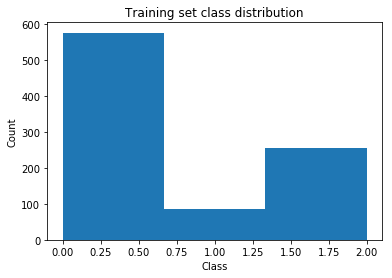

count    916.000000
mean       0.650655
std        0.885962
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        2.000000
dtype: float64


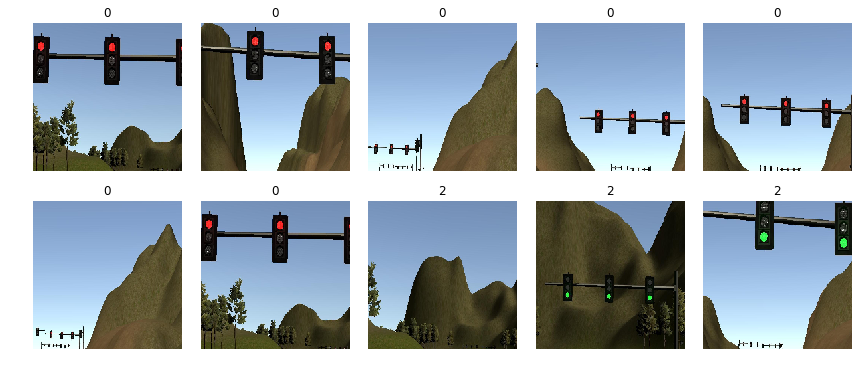

image shape (224, 224, 3)


In [22]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import numpy as np
from random import randint
import scipy.misc

# create Pandas dataframe for analysis of labels
import pandas as pd
trainset=pd.Series(trainY)
n_classes = len(trainset.unique())

# show distribution of training data

#trainset.value_counts().plot.bar()
plt.hist(trainY, n_classes)
plt.title("Training set class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print (trainset.describe())

# show image of 10 random data points
fig, axs = plt.subplots(2,5, figsize=(15, 6))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(10):
    index = randint(0, len(trainX-1))
    image = trainX[index]
    axs[i].axis('off')
    rgb = scipy.misc.toimage(image)
    axs[i].imshow(rgb)
    axs[i].set_title(trainY[index])
plt.show()
print ('image shape', image.shape)

# Train Classifier Network

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Dropout
from keras.layers.convolutional import Convolution2D, Cropping2D

keep_prob = 0.2

model = Sequential()

model.add(Lambda(lambda x: x / 127.5 - 1.0, input_shape=(224, 224, 3)))

#crop 70 from top and 20 from bottom
#model.add(Cropping2D(cropping=((70, 20), (0, 0))))

model.add(Convolution2D(24, (5, 5), strides=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(36, (5, 5), strides=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(48, (5, 5), strides=(2, 2), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Dropout(keep_prob))

model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(trainX, trainY, validation_data = (testX, testY), epochs=50)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 916 samples, validate on 306 samples
Epoch 1/50
916/916 [==============================] - 4s 4ms/step - loss: 7.6653 - val_loss: 0.9303
Epoch 2/50
916/916 [==============================] - 3s 3ms/step - loss: 0.8064 - val_loss: 0.8498
Epoch 3/50
916/916 [==============================] - 3s 3ms/step - loss: 0.7865 - val_loss: 0.9389
Epoch 4/50
916/916 [==============================] - 3s 3ms/step - loss: 0.7781 - val_loss: 0.8439
Epoch 5/50
916/916 [==============================] - 3s 3ms/step - loss: 0.7446 - val_loss: 0.7287
Epoch 6/50
916/916 [==============================] - 3s 3ms/step - loss: 0.6338 - val_loss: 0.5341
Epoch 7/50
916/916 [==============================] - 3s 3ms/step - loss: 0.5026 - val_loss: 0.4582
Epoch 8/50
916/916 [==============================] - 3s 3ms/step - loss: 0.4333 - val_loss: 0.3565
Epoch 9/50
916/916 [==============================] - 3s 3ms/step - loss: 0.3970 - val_loss: 0.3142
Epoch 10/50
916/916 [==============================] -

In [21]:
model.save('highway_model-ep50.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_3 (Lambda)            (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 110, 110, 24)      1824      
_________________________________________________________________
dropout_6 (Dropout)          (None, 110, 110, 24)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 53, 53, 36)        21636     
_________________________________________________________________
dropout_7 (Dropout)          (None, 53, 53, 36)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 25, 25, 48)        43248     
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 48)        0         
__________